<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/Neural_Network_-_basic_scheme_with_legends.png" 
   width="750" height="200" style="margin: 5px auto; display: block; position: relative; left: -10px; bottom: 10px" />
</div>



## Submodule -1.6 : Neural Netwok Architectures

## Table of Contents
####  1.  [Handcoded 2D Convolution in PyTorch](#Handcoded-2D-Convolution-in-PyTorch)
####  2.  [Handcoded 2D Convolution in TensorFlow](#Handcoded-2D-Convolution-in-TensorFlow)
####  3.  [Vanilla Convolution using PyTorch API](#Vanilla-Convolution-using-PyTorch-API)
####  4.  [Vanilla Convolution using TF2.0 API](#Vanilla-Convolution-using-TF2-API)
####  5.  [Padding in PyTorch](#Padding-in-PyTorch)
####  6.  [Padding in TF2.0](#Padding-in-TF2)
####  7.  [Striding in PyTorch](#Striding-in-PyTorch)
####  8.  [Striding in TF2.0](#Striding-in-TF2)
####  9.  [Max Pooling in PyTorch](#Max-Pooling-in-PyTorch)
#### 10. [Max Pooling in TF2.0](#Max-Pooling-in-TF2)
#### 11. [Max Pooling + Stride in PyTorch](#Max-Pooling-+-Stride-in-PyTorch)
#### 12. [Max Pooling + Stride in TF2.0](#Max-Pooling-+-Stride-in-TF2)
#### 13. [Vanishing and Exploding Gradient](#Vanishing-and-Exploding-Gradient)
#### 14. [Max Pooling + Stride](#Max-Pooling-+-Stride)
#### 15. [RNN for Sine Wave in PyTorch](#RNN-for-Sine-Wave-in-PyTorch)
#### 16. [LSTM for Sine Wave in TensorFlow](#LSTM-for-Sine-Wave-in-TensorFlow)
#### 17. [LSTM for Sine wave in TensorFlow using TimeSerisGenerator](#LSTM-for-Sine-wave-in-TensorFlow-using-TimeSerisGenerator)


# Handcoded 2D Convolution in PyTorch

In [104]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt
import torch.nn as nn

class conv2D_PyT(nn.Module):
    def __init__(self, kernel):
        super().__init__()
        self.weight = nn.Parameter(kernel)
        
    def conv(self, x, k):
        r, c = self.weight.shape
        #dimension of convolved output: 
        ##(height of input - height of kernel + 1, width of input - width of kernel + 1)
        cr, cc = x.shape[0] - r + 1, x.shape[1]-c + 1
        y = torch.zeros((cr, cc))
        for i in range(cr):
            for j in range(cc):
                temp = x[i:i+cr, j:j + cc]*k
                y[i, j] = (temp).sum()
        return y
        
    def forward(self, x):
        return self.conv(x, self.weight)
    

#Inpurt
x = torch.tensor([[0,1,2], [3,4,5], [6,7,8]])
# Kernel
k = torch.tensor([[0.0,1.0], [2.0,3.0]])
m = conv2D_PyT(k)

y = m(x)
print(f"Convolution Output in Torch is ")
print(f":{y.detach().numpy()}")


Convolution Output in Torch is 
:[[19. 25.]
 [37. 43.]]


# Handcoded 2D Convolution in TensorFlow

In [105]:
import tensorflow as tf

class conv2D_tf(tf.keras.layers.Layer):
    def __init__(self, kernel):
        super(conv2D_tf, self).__init__()
        self.kernel = kernel
        self.weight = tf.Variable(self.kernel)
    
    def conv(self, x):
        r, c = self.weight.shape
        cr, cc = x.shape[0] - r + 1, x.shape[1]-c + 1
        y = tf.Variable(tf.zeros((cr, cc)))
        for i in range(cr):
            for j in range(cc):
                temp = tf.math.multiply(x[i:i+cr, j:j + cc], self.weight)
                y[i, j].assign(tf.reduce_sum(temp))
        return y

    def call(self, inputs):
        return self.conv(inputs) 
    
#Inpurt
x = tf.constant([[0,1,2], [3,4,5], [6,7,8]], dtype='float32')
# Kernel
k = tf.constant([[0.0,1.0], [2.0,3.0]], dtype='float32')
m = conv2D_tf(k) 
print(f"Convolution Output in TF is ")
print(f":{m(x).numpy()}")



Convolution Output in TF is 
:[[19. 25.]
 [37. 43.]]


# Vanilla Convolution using PyTorch API


In [86]:
import torch
import torch.nn as nn
import numpy as np

## Input data charecterstics
n_batch = 1
n_channel = 1
n_row = 3
n_col = 3

## Reshaping the input
x = torch.zeros(1, 1, 3, 3)
x[:,:,...] = torch.tensor([[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]])


### Defining a convolution layers
m = torch.nn.Conv2d(in_channels = n_channel, out_channels = n_channel, kernel_size = 2, stride=1)

## user Defined kernel
k = torch.tensor([[0,1], [2,3]])
kn = torch.Tensor([[0 ,1],[2, 3]]).unsqueeze(0).unsqueeze(0)

## Changing parametrs of Layers
m.parametrs = nn.Parameter(kn)
m.weight = nn.Parameter(kn)
m.bias = nn.Parameter(torch.tensor([0.0]))

### Convolution Output
y = m(x)

print(f"Convolved Output y: {y.detach().numpy()[0][0]}")

Convolved Output y: [[19. 25.]
 [37. 43.]]


# Vanilla Convolution using TF2 API


In [157]:
import tensorflow as tf
input_shape = (1, 3, 3, 1)
x = [[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]]
x = np.expand_dims(x, axis=0)
x = np.expand_dims(x, axis=-1)


def kernel_init(shape, dtype=None, partition_info=None):
    kernel = np.zeros(shape)
    kernel[:,:,0,0] = np.array([[0,1], [2,3]])
    return kernel



y = tf.keras.layers.Conv2D(1, 2, activation=None, kernel_initializer=kernel_init, input_shape=x[1:])(x)

print("Convolved Output y in TF2.0:")
print(f"{y.numpy()[0]}")


Convolved Output y in TF2.0:
[[[19.]
  [25.]]

 [[37.]
  [43.]]]


# Padding in PyTorch


In [94]:
import torch
import torch.nn as nn
import numpy as np

## Input data charecterstics
n_batch = 1
n_channel = 1
n_row = 3
n_col = 3

## Reshaping the input
x = torch.zeros(1, 1, 3, 3)
x[:,:,...] = torch.tensor([[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]])


### Defining a convolution layers
m = torch.nn.Conv2d(in_channels = n_channel, out_channels = n_channel, kernel_size = 2, stride=1, padding=1)

## user Defined kernel
k = torch.tensor([[0,1], [2,3]])
kn = torch.Tensor([[0 ,1],[2, 3]]).unsqueeze(0).unsqueeze(0)

## Changing parametrs of Layers
m.parametrs = nn.Parameter(kn)
m.weight = nn.Parameter(kn)
m.bias = nn.Parameter(torch.tensor([0.0]))

### Convolution + Padding Output
y = m(x)

print(f"Convolved + Padded Output y: {y.detach().numpy()[0][0]}")


Convolved + Padded Output y: [[ 0.  3.  8.  4.]
 [ 9. 19. 25. 10.]
 [21. 37. 43. 16.]
 [ 6.  7.  8.  0.]]


# Padding in TF2


In [179]:
import tensorflow as tf
input_shape = (1, 3, 3, 1)
x = [[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]]
x = np.expand_dims(x, axis=0)
x = np.expand_dims(x, axis=-1)


def kernel_init(shape, dtype=None, partition_info=None):
    kernel = np.zeros(shape)
    kernel[:,:,0,0] = np.array([[0,1], [2,3]])
    return kernel


y = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
y = tf.keras.layers.Conv2D(1, 2, activation=None, padding='valid', strides=(1,1),\
                           kernel_initializer=kernel_init, input_shape=x[1:])(y)

print("Convolved + Padded Output y in TF2.0:")
print(f"{y.numpy()[0,:,:,0]}")

Convolved + Padded Output y in TF2.0:
[[ 0.  3.  8.  4.]
 [ 9. 19. 25. 10.]
 [21. 37. 43. 16.]
 [ 6.  7.  8.  0.]]


# Striding in PyTorch

In [93]:
import torch
import torch.nn as nn
import numpy as np

## Input data charecterstics
n_batch = 1
n_channel = 1
n_row = 3
n_col = 3

## Reshaping the input
x = torch.zeros(1, 1, 3, 3)
x[:,:,...] = torch.tensor([[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]])


### Defining a convolution layers
m = torch.nn.Conv2d(in_channels = n_channel, out_channels = n_channel, kernel_size = 2, stride=(3,2), padding=1)

## user Defined kernel
k = torch.tensor([[0,1], [2,3]])
kn = torch.Tensor([[0 ,1],[2, 3]]).unsqueeze(0).unsqueeze(0)

## Changing parametrs of Layers
m.parametrs = nn.Parameter(kn)
m.weight = nn.Parameter(kn)
m.bias = nn.Parameter(torch.tensor([0.0]))

### Convolution + Padding Output + Striding
y = m(x)

print(f"Convolved + Padded + Strided Output y: {y.detach().numpy()[0][0]}")

Convolved + Padded + Strided Output y: [[0. 8.]
 [6. 8.]]


# Striding in TF2


In [180]:
import tensorflow as tf
input_shape = (1, 3, 3, 1)
x = [[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]]
x = np.expand_dims(x, axis=0)
x = np.expand_dims(x, axis=-1)


def kernel_init(shape, dtype=None, partition_info=None):
    kernel = np.zeros(shape)
    kernel[:,:,0,0] = np.array([[0,1], [2,3]])
    return kernel


y = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
y = tf.keras.layers.Conv2D(1, 2, activation=None, padding='valid', strides=(3,2),\
                           kernel_initializer=kernel_init, input_shape=x[1:])(y)

print("Convolved + Padded Output y in TF2.0:")
print(f"{y.numpy()[0,:,:,0]}")

Convolved + Padded Output y in TF2.0:
[[0. 8.]
 [6. 8.]]


# Max Pooling in PyTorch

In [98]:
x = torch.zeros(1, 1, 3, 3)
x[:,:,...] = torch.tensor([[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]])

m = nn.MaxPool2d(2, stride=1)

y = m(x)

print(f"Max pooled Output y: {y.detach().numpy()[0][0]}")

Maxpooled Output y: [[4. 5.]
 [7. 8.]]


# Max Pooling in TF2

In [188]:
import tensorflow as tf
input_shape = (1, 3, 3, 1)
x = [[0.0,1.0,2.0], [3.0,4.0,5.0], [6.0,7.0,8.0]]
x = np.expand_dims(x, axis=0)
x = np.expand_dims(x, axis=-1)

y = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=(1,1), padding='valid')(x)

print("MaxPooled Output y in TF2.0:")
print(f"{y.numpy()[0,:,:,0]}")

MaxPooled Output y in TF2.0:
[[4. 5.]
 [7. 8.]]


# Max Pooling + Stride in PyTorch

In [103]:
x = torch.zeros(1, 1, 4, 4)
x[:,:,...] = torch.tensor([[0.0,1.0,2.0, 1.0], [3.0,4.0,5.0, 4.0], [6.0,7.0,8.0, 7.0], [2.0,1.0,4.0,3.0]])

m = nn.MaxPool2d(2, stride=2)

y = m(x)

print(f"Max pooled Output y: {y.detach().numpy()[0][0]}")

Max pooled Output y: [[4. 5.]
 [7. 8.]]


# Max Pooling + Stride in TF2


In [189]:
import tensorflow as tf
input_shape = (1, 3, 3, 1)
x = [[0.0,1.0,2.0, 1.0], [3.0,4.0,5.0, 4.0], [6.0,7.0,8.0, 7.0],[2.0,1.0,4.0,3.0]]
x = np.expand_dims(x, axis=0)
x = np.expand_dims(x, axis=-1)

y = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=(2,2), padding='valid')(x)

print("MaxPooled Output y in TF2.0:")
print(f"{y.numpy()[0,:,:,0]}")

MaxPooled Output y in TF2.0:
[[4. 5.]
 [7. 8.]]


# Vanishing and Exploding Gradient

Text(0, 0.5, '\\textit{y}')

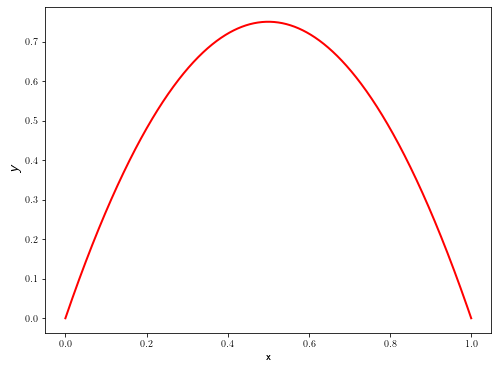

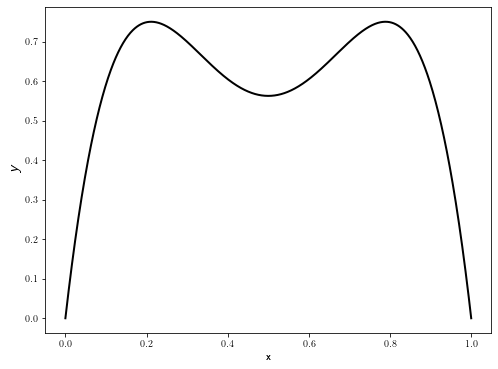

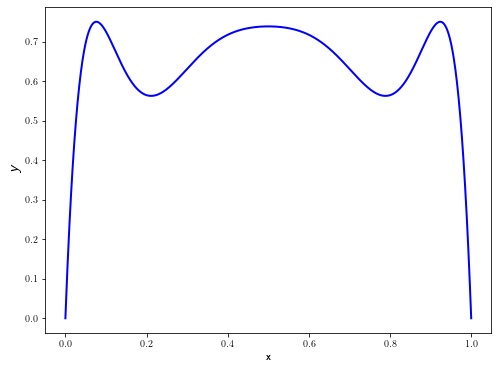

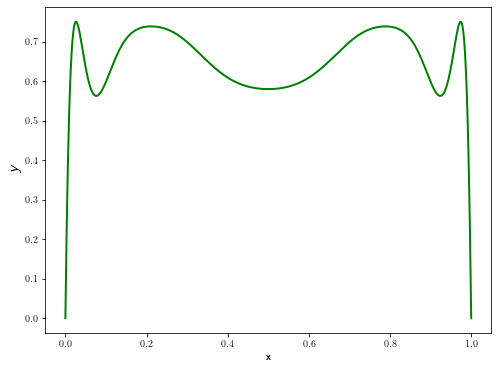

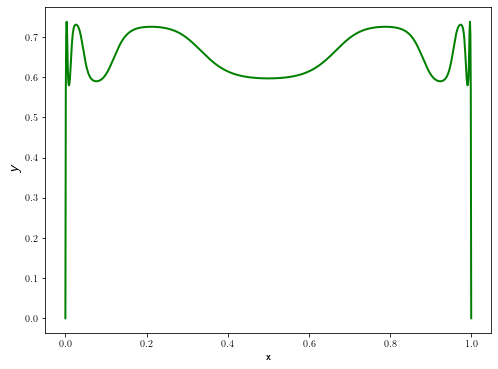

In [107]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

f = lambda x: 3*x*(1-x)

x = np.linspace(0, 1, 1000)
y0 = f(x)
y1 = f(y0)
y2 = f(y1)
y3 = f(y2)

y4 = f(f(f(f(y3))))



fig0, ax0 = plt.subplots(figsize=(8,6))


ax0.plot(x, y0, '-r', linewidth=2.0)
ax0.set_xlabel(r'\textbf{x}')
ax0.set_ylabel('\\textit{y}', fontsize=16)
#ax0.set_title(r' $ f(x):=3x(1 - x)$', fontsize=16, color='k')

fig1, ax1 = plt.subplots(figsize=(8,6))


ax1.plot(x, y1, '-k', linewidth=2.0)
ax1.set_xlabel(r'\textbf{x}')
ax1.set_ylabel('\\textit{y}', fontsize=16)
#ax1.set_title(r' $ f(x):=6.5x(1 - x^2)$', fontsize=16, color='k')


fig2, ax2 = plt.subplots(figsize=(8,6))


ax2.plot(x, y2, '-b', linewidth=2.0)
ax2.set_xlabel(r'\textbf{x}')
ax2.set_ylabel('\\textit{y}', fontsize=16)
#ax2.set_title(r' $ f(x):=6.5x(1 - x^2)$', fontsize=16, color='k')

fig3, ax3 = plt.subplots(figsize=(8,6))

ax3.plot(x, y3, '-g', linewidth=2.0)
ax3.set_xlabel(r'\textbf{x}')
ax3.set_ylabel('\\textit{y}', fontsize=16)
#ax3.set_title(r' $ f(x):=6.5x(1 - x^2)$', fontsize=16, color='k')


fig3, ax4 = plt.subplots(figsize=(8,6))

ax4.plot(x, y4, '-g', linewidth=2.0)
ax4.set_xlabel(r'\textbf{x}')
ax4.set_ylabel('\\textit{y}', fontsize=16)
#ax4.set_title(r' $ f(x):=6.5x(1 - x^2)$', fontsize=16, color='k')

# RNN for Sine Wave in PyTorch

Epoch: 0 loss: 0.00041001729550771415 test loss: 0.00023190096544567496
Epoch: 1 loss: 2.865248916350538e-065 test loss: 1.8099813132721465e-06
Epoch: 2 loss: 5.263462981019984e-076 test loss: 5.11351515797287e-07
Epoch: 3 loss: 3.5708043810700474e-07 test loss: 3.5707961387743126e-07
Epoch: 4 loss: 3.561706307664281e-077 test loss: 3.5617182447822415e-07
Epoch: 5 loss: 3.056149182611989e-077 test loss: 3.056179878058174e-07
Epoch: 6 loss: 3.0506220127790584e-07 test loss: 3.050635655199585e-07
Epoch: 7 loss: 3.044439722543757e-077 test loss: 3.044436027721531e-07
Epoch: 8 loss: 3.036490454633167e-07 test loss: 3.0364824965545267e-07
Epoch: 9 loss: 1.1311581005202243e-07 test loss: 1.1311827563531551e-07
Epoch: 10 loss: 1.1311581005202243e-07 test loss: 1.1311827563531551e-07
Epoch: 11 loss: 1.1311581005202243e-07 test loss: 1.1311827563531551e-07
Epoch: 12 loss: 1.1311581005202243e-07 test loss: 1.1311827563531551e-07
Epoch: 13 loss: 1.1311581005202243e-07 test loss: 1.131182756353155

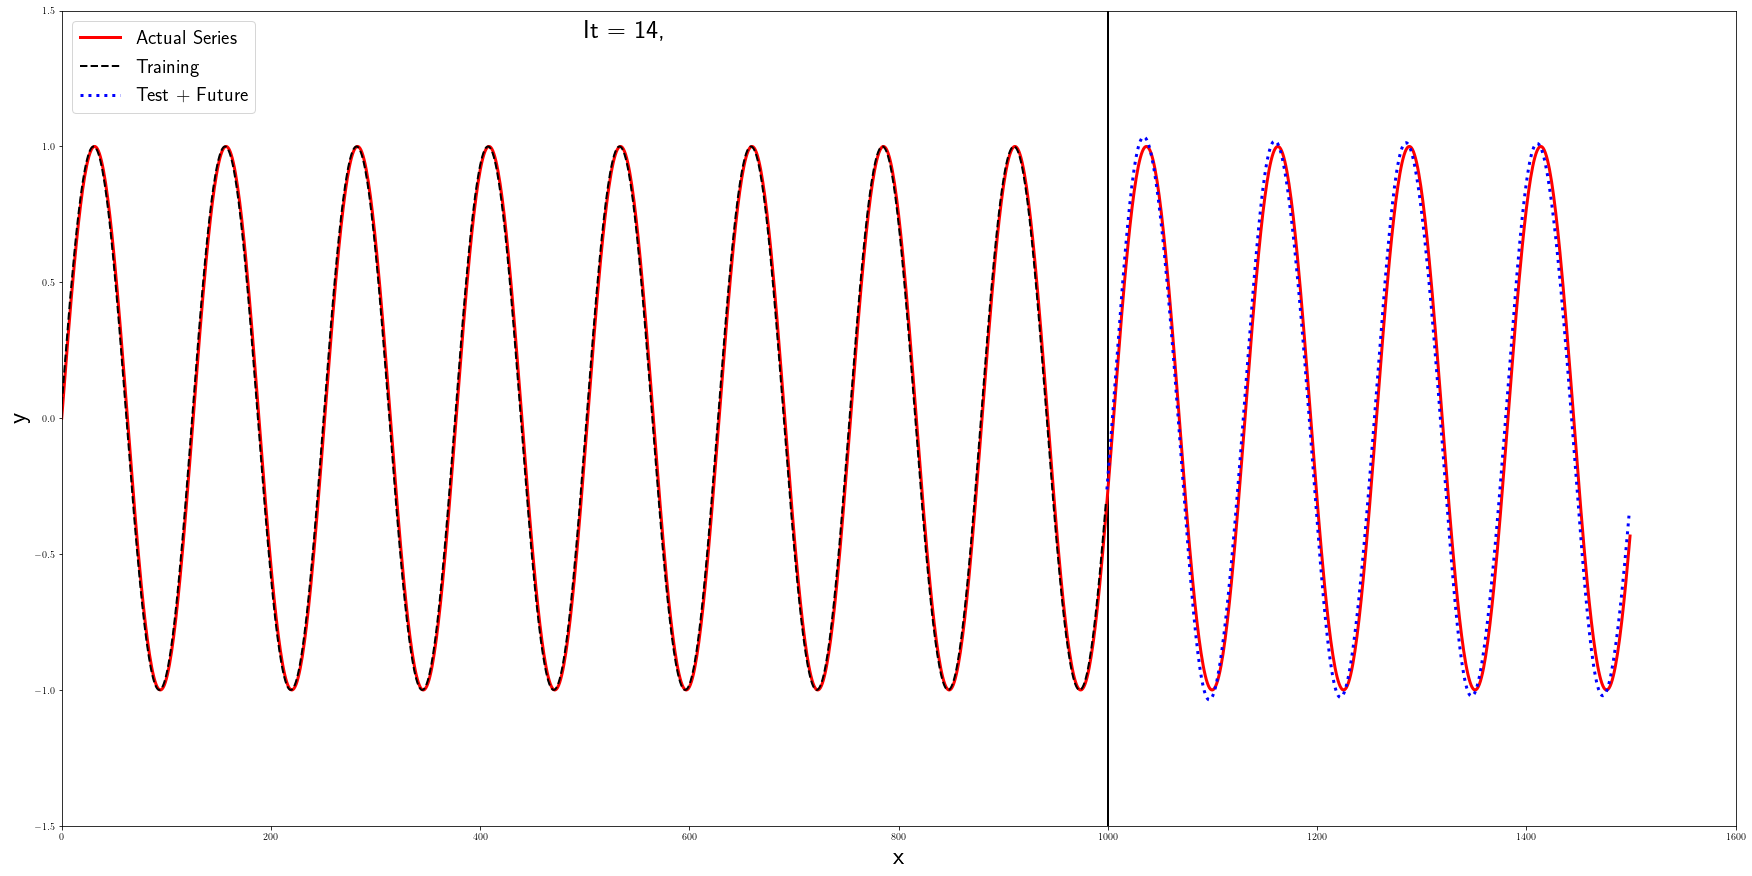

In [113]:
from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import imageio


SEED = 1
np.random.seed(SEED)
torch.manual_seed(SEED)

### Property of Sin function


T = 20 # Period of Sin Function
L = 1000 # Sample Lenght of Sin function
N = 200   # Sequence Length


x = np.empty((N, L), 'int32')
x[:] = np.array(range(L))
data = np.sin(x * (1.0 / T)).astype('float32')
x_f = np.array(range(1500))
data_f = np.sin(x_f * (1.0 / T)).astype('float32')

train_data = torch.from_numpy(data[1:, :-1])
train_target = torch.from_numpy(data[1:, 1:])
test_data = torch.from_numpy(data[:1, :-1])
test_target = torch.from_numpy(data[:1, 1:])



class RNNSin(nn.Module):
    def __init__(self, in_dim, h_dim, out_dim):
        super(RNNSin, self).__init__()
        self.rnn = nn.RNNCell(in_dim, h_dim)
        self.linear = nn.Linear(h_dim, out_dim)
        self.h_dim = h_dim

    def forward(self, train_data, future = 0):
        outputs = []        
        h_t = torch.zeros((train_data.size(0),self.h_dim))
        for i, input_t in enumerate(train_data.chunk(train_data.size(1), dim=1)):
            h_t = self.rnn(input_t,h_t)
            output = self.linear(h_t)
            outputs.append(output)
        for i in range(future):            
            h_t = self.rnn(outputs[-1],h_t)
            output = self.linear(h_t)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

    
seq = RNNSin(1,200,1)
loss_fn = nn.MSELoss()
optimizer = optim.LBFGS(seq.parameters(), lr=0.4)
Nepochs = 15

fig, ax = plt.subplots(figsize=(30,15))
image_list = []
for it in range(Nepochs):
    
    
    def closure():
        optimizer.zero_grad()
        out = seq(train_data)
        loss = loss_fn(out, train_target)
        print('\rEpoch:', it,'loss:', loss.item(), end='')
        loss.backward()
        return loss
    optimizer.step(closure)
    
    future = 500
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(test_data, future=future)
        loss = loss_fn(pred[:, :-future], test_target)
        print(' test loss:', loss.item())
        y = pred.detach().numpy()
    plt.cla()
    ax.set_xlabel('x', fontsize=26)
    ax.set_ylabel('y', fontsize=26)
    ax.set_xlim([0,1600])
    ax.set_ylim([-1.5, 1.5])
    ax.plot(x_f, data_f, "-r", linewidth = 3.0, label="Actual Series")
    ax.plot(np.arange(train_data.size(1)), y[0][:train_data.size(1)], '--k', linewidth = 2.0, label="Training")
    ax.plot(np.arange(train_data.size(1), train_data.size(1) + future), y[0][train_data.size(1):], 'b' + ':', linewidth = 3.0, label="Test + Future")
    ax.vlines(1000, -1.5, 1.5, colors="black", linestyles='solid', linewidth=2.0)   
    ax.text(500.0, 1.4, 'It = %d,' %it, fontdict={'size': 26, 'color':  'black'})
    plt.legend(loc=2, prop={'size': 20})
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    image_list.append(image)
imageio.mimsave('./RNN_sine_1.gif', image_list, fps=1)
    


# LSTM for Sine Wave in TensorFlow

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Data Preperation
def seq_data(x, seq_length):
    X = []
    Y = []
    l = len(x)
    
    for i in range(l):
        end_id = i + seq_length
        if end_id > len(x) - 1:
            print("end id could not be bigger than series length")
            break    
        X.append(x[i:end_id])
        Y.append(x[end_id])
        
    return np.array(X), np.array(Y)
    
x_sin = np.arange(0, 100, 0.1)
y_sin = np.sin(x_sin)
x_test = np.linspace(0, 100, 1000, endpoint=True)
y_test = np.sin(x_test)

x_test_plot = np.copy(x_test)
y_test_plot = np.copy(y_test)

seq_length = 20

x_train, y_train = seq_data(y_sin, seq_length) 
x_test, y_test = seq_data(y_test, seq_length) 

num_features = 1
train_shape = x_train.shape
test_shape = x_test.shape

x_train = x_train.reshape((train_shape[0], train_shape[1], num_features))
x_test = x_test.reshape((test_shape[0], test_shape[1], num_features))


model = Sequential()
model.add(LSTM(10, input_shape = (seq_length, num_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


h = model.fit(x_train, y_train, epochs=20, verbose=1)
y_predict = model.predict(x_test)

pred_x = np.arange(80, 200, 0.1)
pred_y = np.sin(pred_x)
results = []
test_y = pred_y[:seq_length]

for i in range( len(pred_x) - seq_length):
    net_input = test_y[i : i + seq_length]
    net_input = net_input.reshape((1, seq_length, num_features))
    y = model.predict(net_input, verbose=0)
    test_y = np.append(test_y, y)


end id could not be bigger than series length
end id could not be bigger than series length
Epoch 1/20
31/31 [==============================] - 1s 5ms/step - loss: 0.5909
Epoch 2/20
31/31 [==============================] - 0s 5ms/step - loss: 0.3692
Epoch 3/20
31/31 [==============================] - 0s 5ms/step - loss: 0.2477
Epoch 4/20
31/31 [==============================] - 0s 4ms/step - loss: 0.1750
Epoch 5/20
31/31 [==============================] - 0s 4ms/step - loss: 0.1151
Epoch 6/20
31/31 [==============================] - 0s 4ms/step - loss: 0.0635
Epoch 7/20
31/31 [==============================] - 0s 4ms/step - loss: 0.0256
Epoch 8/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 9/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 10/20
31/31 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 11/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 12/20
31/31 [==================

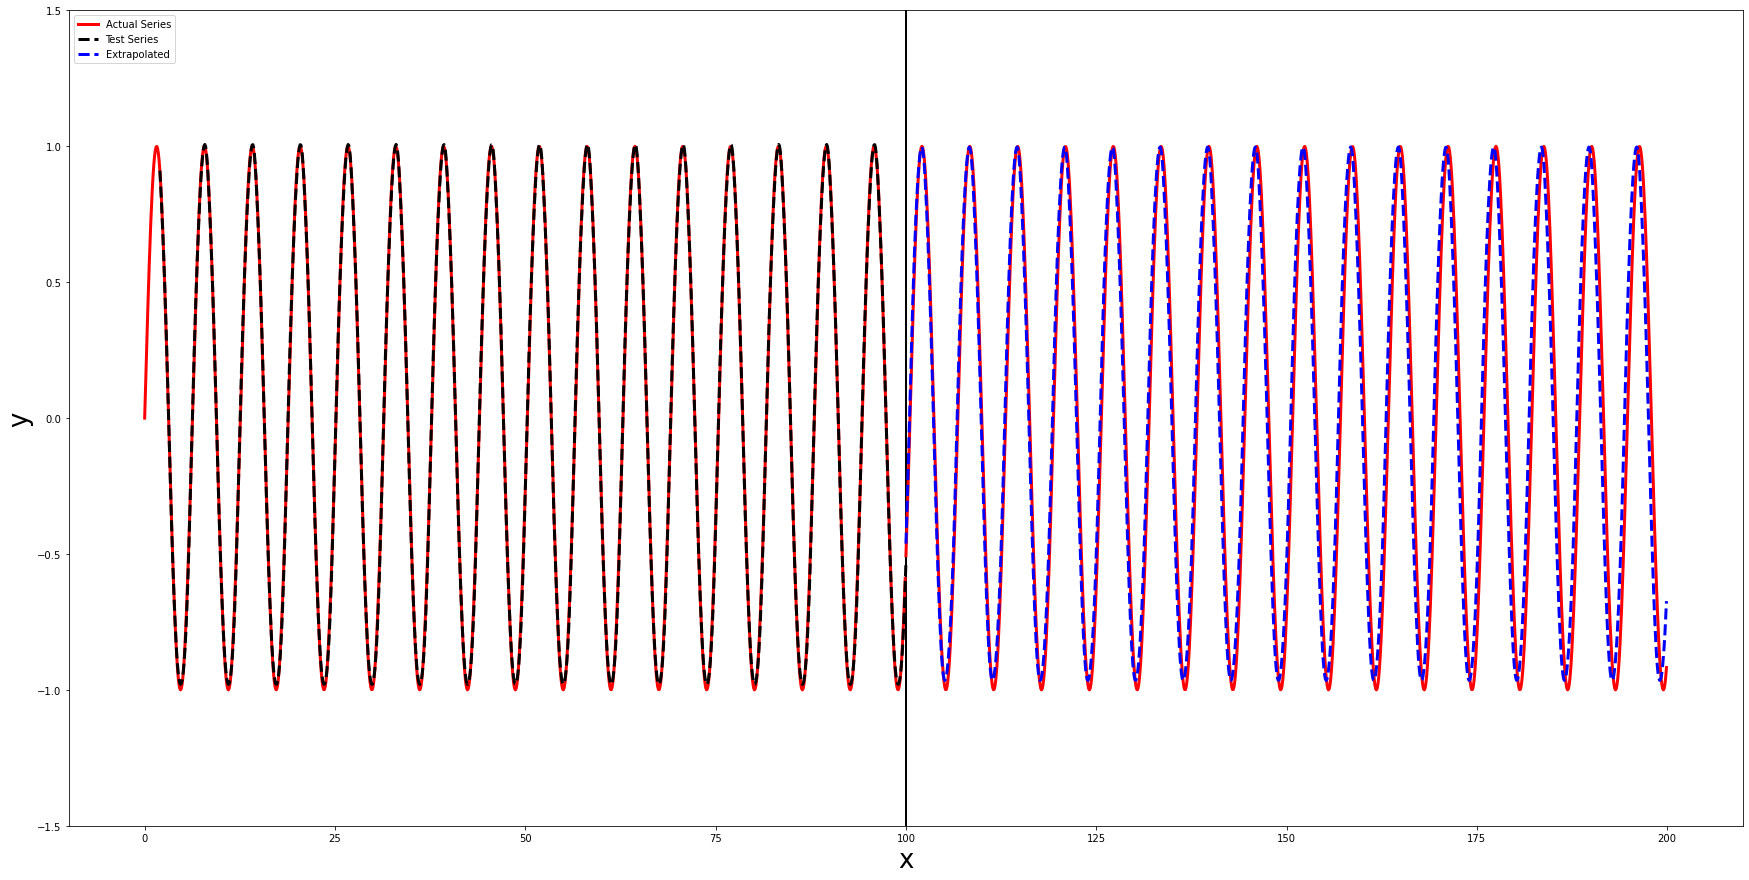

In [2]:
x_ext = np.arange(100, 200, 0.1)
y_ext = np.sin(x_ext)


fig, ax = plt.subplots(figsize=(30,15))
ax.set_xlabel('x', fontsize=26)
ax.set_ylabel('y', fontsize=26)

ax.plot(x_sin, y_sin, "-r", linewidth = 3.0, label="Actual Series")
ax.plot(x_ext, y_ext, "-r", linewidth = 3.0)

ax.plot(x_test_plot[seq_length:], y_predict, "--k", linewidth = 3.0, label="Test Series")
ind = int(seq_length/0.1)
ax.plot(pred_x[ind:], test_y[ind:], "--b", linewidth=3.0, label="Extrapolated")
ax.legend(loc='upper left')
ax.vlines(100, -1.5, 1.5, colors="black", linestyles='solid', linewidth=2.0)   

ax.set_ylim(-1.5, 1.5)
plt.show()



# LSTM for Sine wave in TensorFlow using TimeSerisGenerator

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



x_train = np.arange(0, 100, 0.1)
y_train = np.sin(x_sin)
x_test = np.linspace(100, 200, 1000, endpoint=True)
y_test = np.sin(x_test)
num_features = 1

seq_train = np.reshape(y_train, (len(y_train), num_features))
seq_test =  np.reshape(y_test, (len(y_train), num_features))

seq_length = 20

seq_train_generator =  TimeseriesGenerator(seq_train, seq_train, length=seq_length, sampling_rate = 1,\
                                           stride = 1, batch_size = 5)
seq_test_generator =  TimeseriesGenerator(seq_test, seq_test, length=seq_length, sampling_rate = 1,\
                                           stride = 1, batch_size = 5)


model = Sequential()
model.add(LSTM(10, input_shape = (seq_length, num_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


h = model.fit(seq_train_generator, epochs=20, verbose=1)
y_predict = model.predict(seq_test_generator)

Epoch 1/20
196/196 [==============================] - 2s 4ms/step - loss: 0.1793
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0308
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 4/20
196/196 [==============================] - 1s 4ms/step - loss: 6.1547e-04
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 3.4028e-04
Epoch 6/20
196/196 [==============================] - 1s 4ms/step - loss: 1.8422e-04
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 1.0904e-04
Epoch 8/20
196/196 [==============================] - 1s 4ms/step - loss: 1.0224e-04
Epoch 9/20
196/196 [==============================] - 1s 4ms/step - loss: 7.6052e-05
Epoch 10/20
196/196 [==============================] - 1s 4ms/step - loss: 7.3023e-05
Epoch 11/20
196/196 [==============================] - 1s 4ms/step - loss: 5.2972e-05
Epoch 12/20
196/196 [==============================] - 1s 4ms/step - loss: 

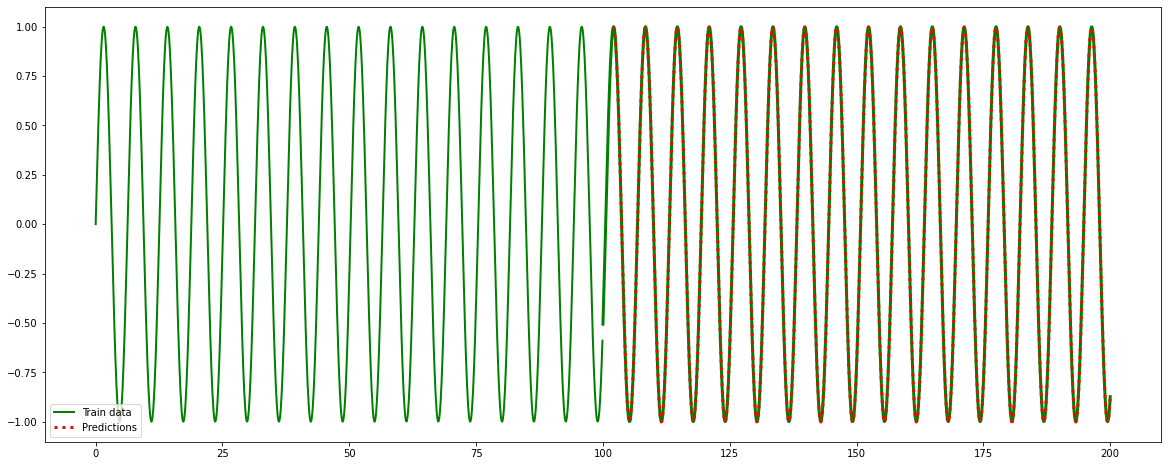

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(x_train,y_train, c="g", lw=2, label='Train data')
ax.plot(x_test,y_test, lw=3, c="g")
ax.plot(x_test[seq_length:],y_predict, lw=3, c='r',linestyle = ':', label='Predictions')
ax.legend(loc="lower left")
plt.show();

In [41]:
ext = list()
st_batch    = y_test[:seq_length].reshape((1,seq_length, num_features))
ct_batch = st_batch
start_seq = ct_batch.reshape((seq_length,1))

num_sample_pred = 800
# extrapolate next 160 values
for i in range(num_sample_pred):
    predicted_value = model.predict(ct_batch)[0]
    ext.append(predicted_value) 
    ct_batch = np.append(ct_batch[:,1:,:],[[predicted_value]],axis=1)
    


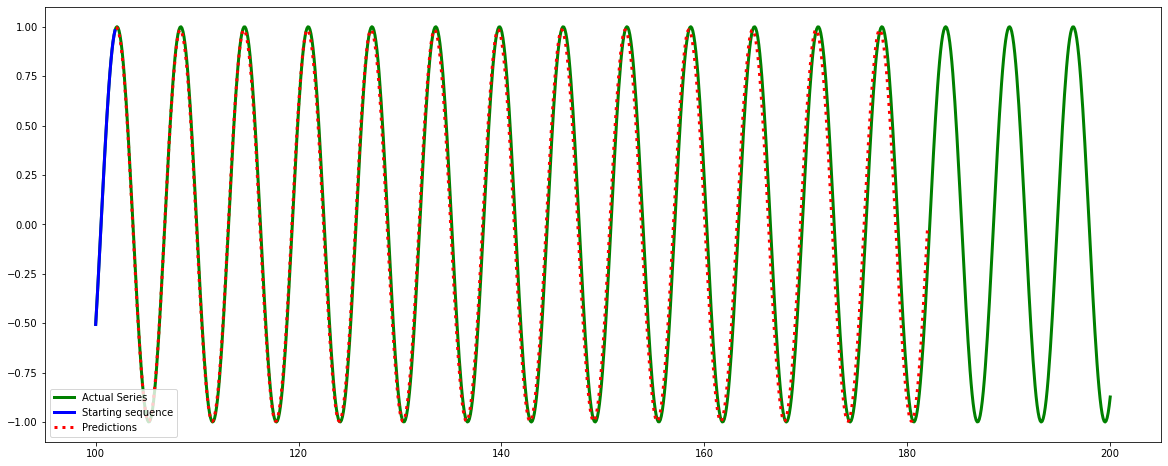

In [42]:
ext_np = np.array(ext)
seq_list = x_test[:seq_length]
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(x_test,y_test, lw=3, c="g", label="Actual Series")
ax.plot(seq_list, start_seq, lw=3, c="b", label="Starting sequence")
ax.plot(x_test[seq_length:num_sample_pred + seq_length],ext_np, lw=3, c='r',linestyle = ':', label='Predictions')
ax.legend(loc="lower left")
plt.show();